# Deribit sample data
   * Tick-by-tick trades data
       * Perpetual
       * Futures
       * Options
   * Order book tick level snapshots - Top 50 levels - snapshot taken every time there was any change in top 50 bids or asks price levels
       * Perpetual
       * Futures
       * Options
   * Incremental order book L2 - Tick-level order book L2 updates for all levels in contrast to top 50 levels snapshots
       * Perpetual
       * Futures
       * Options
   * Quotes - Tick level top of the book data (best bid & ask)
       * Perpetual
       * Futures
       * Options
   * Options chain - Tick-level options summary info (strike prices, expiration dates, open interest, implied volatility, greeks, bbo etc.) for all active options instruments
       * Options Chain
   * Derivative tickers - Funding data, open interest, mark and index prices
       * Perpetual
       * Futures
       
       

In [4]:
from croqr.data.deribit.data_utils import url_csv_zip_file_reader
import os
import pandas as pd
from croqr.common.config import LOCAL_DATA_DIR
from croqr.common.dt_utils import DataTimeUtil
from croqr.data.deribit.config import DeribitSampleDataUrl, get_deribit_sample_data_url
import time
from datetime import timedelta, datetime
from functools import partial
import matplotlib.pylab as plt

In [5]:
display(DeribitSampleDataUrl.asset_class_list)
display(DeribitSampleDataUrl.data_type_list)

['PERPETUALS', 'FUTURES', 'OPTIONS']

['trades',
 'book_snapshot_50',
 'incremental_book_L2',
 'quotes',
 'options_chain',
 'derivative_ticker']

In [6]:
# quick check all data
if False:
    for data_type in DeribitSampleDataUrl.data_type_list:
        for asset_class in DeribitSampleDataUrl.asset_class_list:
            url = get_deribit_sample_data_url(asset_class, data_type)
            df = url_csv_zip_file_reader(url)
            if df is not None:
                display(df.head(2))

## 1) Check trade data 

### 1.1) Perpetual

In [7]:
url = get_deribit_sample_data_url('PERPETUALS', 'trades')
df = url_csv_zip_file_reader(url)

loading cached Deribit_PERPETUALS_trades_2020-07-01_2020-07-31.csv.gz


In [15]:
df['timestamp_s'], df['microsec'] = zip(*df['timestamp'].apply(DataTimeUtil.epoch_time_converter, 1))

df['timestamp_1m'] = df['timestamp_s'].apply(partial(DataTimeUtil.ceil_dt, timedelta(minutes=1)))

df['timestamp_10m'] = df['timestamp_s'].apply(partial(DataTimeUtil.ceil_dt, timedelta(minutes=10)))

df['vol'] = df['price']*df['amount']

In [16]:
df.head()

,symbol,timestamp,local_timestamp,id,side,price,amount,timestamp_s,microsec,timestamp_1m,timestamp_10m,vol
exchange,,,,,,,,,,,,
deribit,BTC-PERPETUAL,1593561604287000,1593561604299954,83913093,buy,9133.0,90,2020-07-01 01:00:04,287000,2020-07-01 01:01:00,2020-07-01 01:10:00,821970.0
deribit,BTC-PERPETUAL,1593561604287000,1593561604299954,83913094,buy,9133.0,3090,2020-07-01 01:00:04,287000,2020-07-01 01:01:00,2020-07-01 01:10:00,28220970.0
deribit,ETH-PERPETUAL,1593561606422000,1593561606431442,ETH-18083992,sell,225.5,1,2020-07-01 01:00:06,422000,2020-07-01 01:01:00,2020-07-01 01:10:00,225.5
deribit,ETH-PERPETUAL,1593561606438000,1593561606446047,ETH-18083993,sell,225.5,1,2020-07-01 01:00:06,438000,2020-07-01 01:01:00,2020-07-01 01:10:00,225.5
deribit,BTC-PERPETUAL,1593561608442000,1593561608461506,83913095,buy,9133.0,2190,2020-07-01 01:00:08,442000,2020-07-01 01:01:00,2020-07-01 01:10:00,20001270.0


Text(0.5, 1.0, 'BTC-PERP trading volume every 10min')

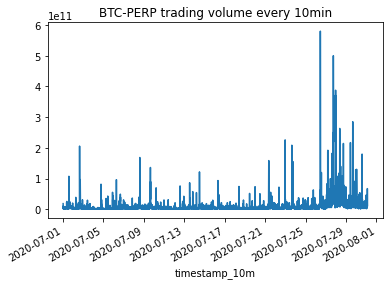

In [17]:
df[df['symbol']=='BTC-PERPETUAL'].groupby('timestamp_10m')['vol'].sum().plot()
plt.title('BTC-PERP trading volume every 10min')

### 1.2) Futures

In [18]:
url = get_deribit_sample_data_url('FUTURES', 'trades')
df = url_csv_zip_file_reader(url)

loading cached Deribit_FUTURES_trades_2020-07-01_2020-07-31.csv.gz


In [24]:
display(df.shape)

(657649, 12)

In [23]:
df['timestamp_s'], df['microsec'] = zip(*df['timestamp'].apply(DataTimeUtil.epoch_time_converter, 1))

df['timestamp_1m'] = df['timestamp_s'].apply(partial(DataTimeUtil.ceil_dt, timedelta(minutes=1)))

df['timestamp_10m'] = df['timestamp_s'].apply(partial(DataTimeUtil.ceil_dt, timedelta(minutes=10)))

df['vol'] = df['price']*df['amount']

In [19]:
df['symbol'].unique()

array(['ETH-25SEP20', 'BTC-25SEP20', 'BTC-25DEC20', 'BTC-26MAR21',
       'ETH-25DEC20', 'ETH-26MAR21'], dtype=object)

In [20]:
df.head()

,symbol,timestamp,local_timestamp,id,side,price,amount
exchange,,,,,,,
deribit,ETH-25SEP20,1593561640656000,1593561640665430,ETH-18083995,buy,227.55,100
deribit,BTC-25SEP20,1593561642083000,1593561642090778,83913108,buy,9201.50,100
deribit,BTC-25SEP20,1593561642083000,1593561642090778,83913109,buy,9201.50,100
deribit,ETH-25SEP20,1593561646090000,1593561646098113,ETH-18083998,buy,227.55,100
deribit,BTC-25DEC20,1593561646724000,1593561646732510,83913111,sell,9267.00,1300


In [21]:
df['symbol'].unique()

array(['ETH-25SEP20', 'BTC-25SEP20', 'BTC-25DEC20', 'BTC-26MAR21',
       'ETH-25DEC20', 'ETH-26MAR21'], dtype=object)

Text(0.5, 1.0, 'BTC-FUTURE trading volume every 10min')

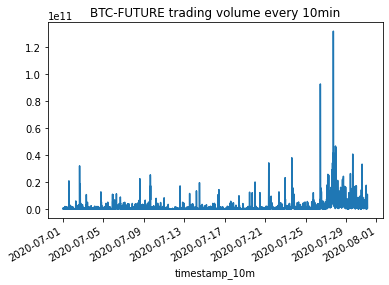

In [27]:
df[df['symbol']=='BTC-25SEP20'].groupby('timestamp_10m')['vol'].sum().plot()
plt.title('BTC-FUTURE trading volume every 10min')

### 1.3) Options

In [30]:
url = get_deribit_sample_data_url('OPTIONS', 'trades')
df = url_csv_zip_file_reader(url)
display(df.shape)

loading cached Deribit_OPTIONS_trades_2020-07-01_2020-07-31.csv.gz


(108723, 7)

In [29]:
df.head()

,symbol,timestamp,local_timestamp,id,side,price,amount
exchange,,,,,,,
deribit,ETH-10JUL20-260-C,1593561650814000,1593561650820880,ETH-18084009,sell,0.003,35.0
deribit,BTC-25DEC20-36000-C,1593561707919000,1593561707926798,83913246,sell,0.008,0.1
deribit,BTC-10JUL20-9000-P,1593561715723000,1593561715736665,83913333,buy,0.023,0.1
deribit,BTC-31JUL20-9750-C,1593561716136000,1593561716148667,83913337,sell,0.032,2.0
deribit,BTC-10JUL20-9500-C,1593561716317000,1593561716350558,83913396,sell,0.014,0.3


In [35]:
sorted(list(df['symbol'].unique())[:8])

['BTC-10JUL20-9000-P',
 'BTC-10JUL20-9500-C',
 'BTC-25DEC20-36000-C',
 'BTC-2JUL20-9250-C',
 'BTC-31JUL20-10000-C',
 'BTC-31JUL20-9750-C',
 'ETH-10JUL20-260-C',
 'ETH-1JUL20-230-C']

## 2) Check book_snapshot_50

### 2.1) Perpetual

In [39]:
url = get_deribit_sample_data_url('PERPETUALS', 'book_snapshot_50')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_PERPETUALS_book_snapshot_50_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,asks[1].price,asks[1].amount,asks[2].price,asks[2].amount,asks[3].price,...,bids[45].price,bids[45].amount,bids[46].price,bids[46].amount,bids[47].price,bids[47].amount,bids[48].price,bids[48].amount,bids[49].price,bids[49].amount
exchange,,,,,,,,,,,,,,,,,,,,,
deribit,ETH-PERPETUAL,1593561600154000,1593561600165998,225.55,6809,225.6,7574,225.65,38476,225.7,...,222.8,160,222.7,4454,222.6,61730,222.5,93965,222.45,16335
deribit,BTC-PERPETUAL,1593561600123000,1593561600185656,9133.00,42520,9133.5,90,9134.00,250,9134.5,...,9110.0,26460,9109.0,36870,9108.5,13990,9108.0,41880,9107.50,170540


### 2.2) Futures

In [40]:
url = get_deribit_sample_data_url('FUTURES', 'book_snapshot_50')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_FUTURES_book_snapshot_50_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,asks[1].price,asks[1].amount,asks[2].price,asks[2].amount,asks[3].price,...,bids[45].price,bids[45].amount,bids[46].price,bids[46].amount,bids[47].price,bids[47].amount,bids[48].price,bids[48].amount,bids[49].price,bids[49].amount
exchange,,,,,,,,,,,,,,,,,,,,,
deribit,ETH-26MAR21,1593561600127000,1593561600168701,230.30,30,230.4,230,230.65,13000,231.4,...,205.5,1,205.0,120,204.5,1,204.0,5,203.5,1
deribit,ETH-25SEP20,1593561596228000,1593561600168768,227.55,720,227.7,11483,227.75,3127,227.8,...,221.0,30150,220.5,150,220.0,150,219.5,150,219.1,10


### 2.3) Options

In [41]:
url = get_deribit_sample_data_url('OPTIONS', 'book_snapshot_50')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_OPTIONS_book_snapshot_50_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,asks[1].price,asks[1].amount,asks[2].price,asks[2].amount,asks[3].price,...,bids[45].price,bids[45].amount,bids[46].price,bids[46].amount,bids[47].price,bids[47].amount,bids[48].price,bids[48].amount,bids[49].price,bids[49].amount
exchange,,,,,,,,,,,,,,,,,,,,,
deribit,ETH-3JUL20-330-P,1593561597050000,1593561600171286,0.9630,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deribit,ETH-3JUL20-330-C,1593561600048000,1593561600171288,0.0005,451.0,0.2,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Check order book L2

### 3.1) Perpetual

In [46]:
url = get_deribit_sample_data_url('PERPETUALS', 'incremental_book_L2')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_PERPETUALS_incremental_book_L2_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount
exchange,,,,,,,
deribit,ETH-PERPETUAL,1593561600154000,1593561600165998,True,ask,225.55,6809
deribit,ETH-PERPETUAL,1593561600154000,1593561600165998,True,ask,225.60,7574


In [47]:
df['is_snapshot'].value_counts()

True     2898
False    2102
Name: is_snapshot, dtype: int64

### 3.2) Futures

In [48]:
url = get_deribit_sample_data_url('FUTURES', 'incremental_book_L2')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_FUTURES_incremental_book_L2_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount
exchange,,,,,,,
deribit,ETH-26MAR21,1593561600127000,1593561600168701,True,ask,230.3,30
deribit,ETH-26MAR21,1593561600127000,1593561600168701,True,ask,230.4,230


In [49]:
df['is_snapshot'].value_counts()

False    3436
True     1564
Name: is_snapshot, dtype: int64

### 3.3) Options

In [50]:
url = get_deribit_sample_data_url('OPTIONS', 'incremental_book_L2')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_OPTIONS_incremental_book_L2_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount
exchange,,,,,,,
deribit,ETH-3JUL20-330-P,1593561597050000,1593561600171286,True,ask,0.9630,5.0
deribit,ETH-3JUL20-330-P,1593561597050000,1593561600171286,True,bid,0.0875,5.0


In [51]:
df['is_snapshot'].value_counts()

True     4997
False       3
Name: is_snapshot, dtype: int64

## 4) Check tick level top of the book data

### 4.1) Perpetual

In [52]:
url = get_deribit_sample_data_url('PERPETUALS', 'quotes')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_PERPETUALS_quotes_2020-07-01_2020-07-31.csv.gz
'url_csv_zip_file_reader'  26.29 sec


,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
exchange,,,,,,,
deribit,ETH-PERPETUAL,1593561600154000,1593561600165998,6809,225.55,225.5,14510
deribit,BTC-PERPETUAL,1593561600123000,1593561600185656,42520,9133.00,9132.5,264230


### 4.2) Futures

In [53]:
url = get_deribit_sample_data_url('FUTURES', 'quotes')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_FUTURES_quotes_2020-07-01_2020-07-31.csv.gz
'url_csv_zip_file_reader'  18.88 sec


,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
exchange,,,,,,,
deribit,ETH-26MAR21,1593561600127000,1593561600168701,30,230.30,230.00,9098
deribit,ETH-25SEP20,1593561596228000,1593561600168768,720,227.55,227.25,7150


### 4.3) Options

In [54]:
url = get_deribit_sample_data_url('OPTIONS', 'quotes')
df = url_csv_zip_file_reader(url)
df.head(2)

loading cached Deribit_OPTIONS_quotes_2020-07-01_2020-07-31.csv.gz
file size > 500MB, load top 5000 rows


,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
exchange,,,,,,,
deribit,ETH-3JUL20-330-P,1593561597050000,1593561600171286,5.0,0.9630,0.0875,5.0
deribit,ETH-3JUL20-330-C,1593561600048000,1593561600171288,451.0,0.0005,NaN,NaN


## 5) Options chain

### 5.1) Options Chain

In [64]:
# TBD

## 6) Funding data, open interest, mark and index prices

### 6.1) Perpetual

In [59]:
url = get_deribit_sample_data_url('PERPETUALS', 'derivative_ticker')
df = url_csv_zip_file_reader(url)

In [61]:
df.describe()

,timestamp,local_timestamp,funding_timestamp,funding_rate,predicted_funding_rate,open_interest,last_price,index_price,mark_price
count,4.107024e+06,4.107024e+06,0.0,4.107024e+06,0.0,4.107024e+06,4.107024e+06,4.107024e+06,4.107024e+06
mean,1.595023e+15,1.595023e+15,NaN,2.262745e-04,NaN,7.789649e+07,6.940841e+03,6.937556e+03,6.940831e+03
std,8.013707e+11,8.013713e+11,NaN,4.393484e-04,NaN,3.575700e+07,4.290416e+03,4.288048e+03,4.290406e+03
min,1.593562e+15,1.593562e+15,NaN,-3.586000e-03,NaN,1.807489e+07,2.228000e+02,2.230300e+02,2.229300e+02
25%,1.594293e+15,1.594293e+15,NaN,0.000000e+00,NaN,2.868032e+07,3.223000e+02,3.220300e+02,3.223300e+02
50%,1.595131e+15,1.595131e+15,NaN,0.000000e+00,NaN,9.260894e+07,9.206000e+03,9.203310e+03,9.205860e+03
75%,1.595793e+15,1.595793e+15,NaN,3.225500e-04,NaN,9.494000e+07,9.511000e+03,9.503850e+03,9.511000e+03
max,1.596161e+15,1.596161e+15,NaN,8.553000e-03,NaN,1.339326e+08,1.144400e+04,1.141165e+04,1.143543e+04


### 6.2) Futures

In [58]:
url = get_deribit_sample_data_url('FUTURES', 'derivative_ticker')
df = url_csv_zip_file_reader(url)

In [62]:
df.head(2)

,symbol,timestamp,local_timestamp,funding_timestamp,funding_rate,predicted_funding_rate,open_interest,last_price,index_price,mark_price
exchange,,,,,,,,,,
deribit,ETH-PERPETUAL,1593561600154000,1593561600158197,NaN,0.0,NaN,20111752,225.5,225.54,225.52
deribit,BTC-PERPETUAL,1593561600123000,1593561600174960,NaN,0.0,NaN,93554720,9132.5,9135.32,9133.78


In [63]:
df.describe()

,timestamp,local_timestamp,funding_timestamp,funding_rate,predicted_funding_rate,open_interest,last_price,index_price,mark_price
count,4.107024e+06,4.107024e+06,0.0,4.107024e+06,0.0,4.107024e+06,4.107024e+06,4.107024e+06,4.107024e+06
mean,1.595023e+15,1.595023e+15,NaN,2.262745e-04,NaN,7.789649e+07,6.940841e+03,6.937556e+03,6.940831e+03
std,8.013707e+11,8.013713e+11,NaN,4.393484e-04,NaN,3.575700e+07,4.290416e+03,4.288048e+03,4.290406e+03
min,1.593562e+15,1.593562e+15,NaN,-3.586000e-03,NaN,1.807489e+07,2.228000e+02,2.230300e+02,2.229300e+02
25%,1.594293e+15,1.594293e+15,NaN,0.000000e+00,NaN,2.868032e+07,3.223000e+02,3.220300e+02,3.223300e+02
50%,1.595131e+15,1.595131e+15,NaN,0.000000e+00,NaN,9.260894e+07,9.206000e+03,9.203310e+03,9.205860e+03
75%,1.595793e+15,1.595793e+15,NaN,3.225500e-04,NaN,9.494000e+07,9.511000e+03,9.503850e+03,9.511000e+03
max,1.596161e+15,1.596161e+15,NaN,8.553000e-03,NaN,1.339326e+08,1.144400e+04,1.141165e+04,1.143543e+04
